In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from matplotlib.cbook import normalize_kwargs



In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(n_samples =250,noise =0.2, random_state=10)

<Axes: >

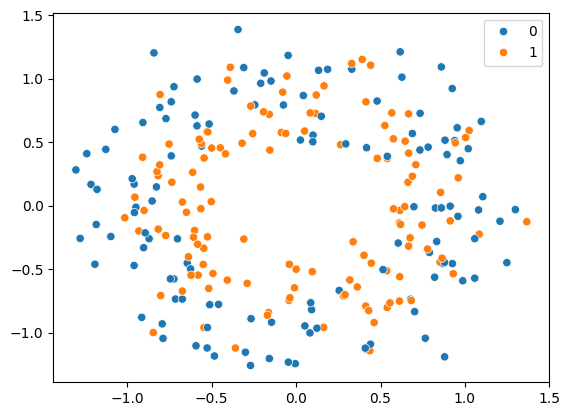

In [ ]:
sns.scatterplot(x = X[:,0],y=X[:,1],hue=y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

differnce between accuracy and validation accuracy is huge means it is a case of overfitting

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0)

In [ ]:
import numpy as np
val = np.array(history.history["loss"]) - np.array(history.history['val_accuracy'])


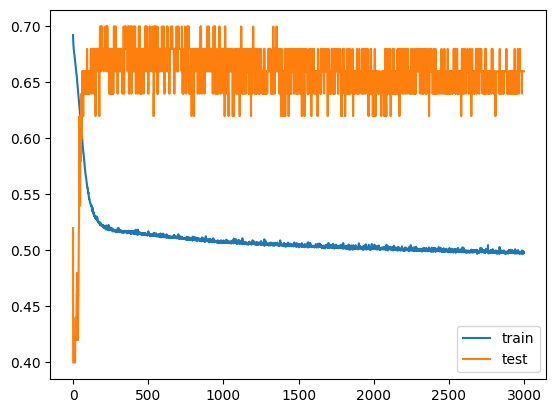

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

Here we need Early Stopping

In [ ]:
model = Sequential()
model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])


In [ ]:
callback = EarlyStopping(
    monitor= "accuracy",#"val_loss", what i am going to be monitor
    min_delta = 0.00001, #if this much changes is happening in this epoch , consider this
    mode="auto", #direction automatically  decides
    verbose = 2,
    baseline= None,
    restore_best_weights= False, # if in early epoch i get best level of monitor , we will restore it
    patience = 20
)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks= callback)

Epoch 1/3000
7/7 [==============================] - 0s 20ms/step - loss: 0.5369 - accuracy: 0.7300 - val_loss: 0.6736 - val_accuracy: 0.6400
Epoch 2/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.5362 - accuracy: 0.7350 - val_loss: 0.6630 - val_accuracy: 0.6600
Epoch 3/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.5365 - accuracy: 0.7450 - val_loss: 0.6550 - val_accuracy: 0.6800
Epoch 4/3000
7/7 [==============================] - 0s 7ms/step - loss: 0.5353 - accuracy: 0.7450 - val_loss: 0.6602 - val_accuracy: 0.6600
Epoch 5/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.5355 - accuracy: 0.7500 - val_loss: 0.6658 - val_accuracy: 0.6400
Epoch 6/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.5358 - accuracy: 0.7450 - val_loss: 0.6723 - val_accuracy: 0.6600
Epoch 7/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.5358 - accuracy: 0.7450 - val_loss: 0.6742 - val_accuracy: 0.6600
Epoch 8/3000
7/7

Scaling bhi karni padti hai kabhi kabhi




In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [ ]:
sns